In [1]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# Style Dictionary to standarize plotting
# scheme between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [3]:
# set working directory
import os
os.chdir("/Users/kaeliaokamura/Desktop/Shen UAV Research/Feb8")

In [4]:
# load data from specific hour
hour_00 = pygrib.open('urma2p5.t00z.2dvaranl_ndfd.grb2_wexp')

In [5]:
# save data in 7 csv in matrix format
uwind=hour_00[5]
vwind=hour_00[6]
windir=hour_00[8]
windsp=hour_00[9]
gust=hour_00[10]

uvalues=uwind.values
vvalues=vwind.values
windir_values=windir.values
windsp_values=windsp.values
gust_values=gust.values


lats,lons=gust.latlons()

## Saving data from specific locations

In [6]:
# save data in data frame to find Rocky Mountains faster
lat=lats.flatten()
lon=lons.flatten()
uwinds=uvalues.flatten()
vwinds=vvalues.flatten()
speed=windsp_values.flatten()
wdir=windir_values.flatten()
gust=gust_values.flatten()



df_US = pd.DataFrame({"lat": lat.T,'lon':lon.T,'vwind':vwinds.T,'uwind':uwinds.T,
                      'speed':speed.T,'wdir':wdir.T,'gust':gust.T})

dataRM=df_US.query('(lat>=44.1143) & (lat<=44.4143)&(lon>=-109.937)&(lon<=-109.637)')

dataRM.head()

,lat,lon,vwind,uwind,speed,wdir,gust
2308279,44.115189,-109.675924,-2.03,9.72,9.93,275.6,20.65
2308280,44.117510,-109.646146,-0.30,5.14,5.15,267.1,18.21
2310616,44.117827,-109.917391,-2.27,1.72,2.85,316.5,10.15
2310617,44.120186,-109.887617,-2.39,-0.89,2.55,14.2,5.41
2310618,44.122540,-109.857842,-2.43,-0.29,2.45,0.6,4.79


In [7]:
# save data in data frame to find Alta Wind Energy Center faster

dataAWEC=df_US.query('(lat>=34.87) & (lat<=35.17)&(lon>=-118.47)&(lon<=-118.17)')

dataAWEC.head()

,lat,lon,vwind,uwind,speed,wdir,gust
1433238,34.871270,-118.279232,-2.00,-4.95,5.34,58.1,8.80
1433239,34.875111,-118.252220,-2.01,-4.85,5.25,57.6,8.64
1433240,34.878948,-118.225207,-2.04,-4.48,4.92,55.7,8.47
1433241,34.882780,-118.198191,-2.04,-4.07,4.56,53.6,8.23
1433242,34.886607,-118.171174,-1.75,-3.99,4.36,56.5,8.17


In [8]:
# save data in data frame to find Colorado Plateau faster

dataCP=df_US.query('(lat>=36.8503) & (lat<=37.1503)&(lon>=-110.151)&(lon<=-109.851)')


dataCP.head()

,lat,lon,vwind,uwind,speed,wdir,gust
1539075,36.852656,-109.907756,-1.59,-0.62,1.71,15.0,1.96
1539076,36.855104,-109.880011,-1.64,-0.35,1.68,5.7,1.72
1539077,36.857549,-109.852264,-1.45,-0.07,1.46,356.6,1.66
1541412,36.855098,-110.132779,-1.68,0.32,1.71,342.7,1.74
1541413,36.857584,-110.105039,-1.68,0.32,1.71,342.9,1.71


------------------
------------------

# Test Fitter Package for all distributions at each location

------------------
------------------

## Rocky Mountains

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
johnsonsu,0.264779,700.991343,-858.103904,inf
burr12,0.265546,695.047314,-857.698783,inf
norminvgauss,0.266045,698.049704,-857.435858,inf
nct,0.266129,702.813174,-857.391995,inf
dgamma,0.269203,679.581893,-860.725575,inf
burr,0.270314,699.820178,-855.207084,inf
mielke,0.270314,699.820182,-855.207081,inf
genlogistic,0.270793,697.814164,-859.900961,inf
exponnorm,0.274199,703.063942,-858.151330,inf
fisk,0.275213,691.592194,-857.634415,inf


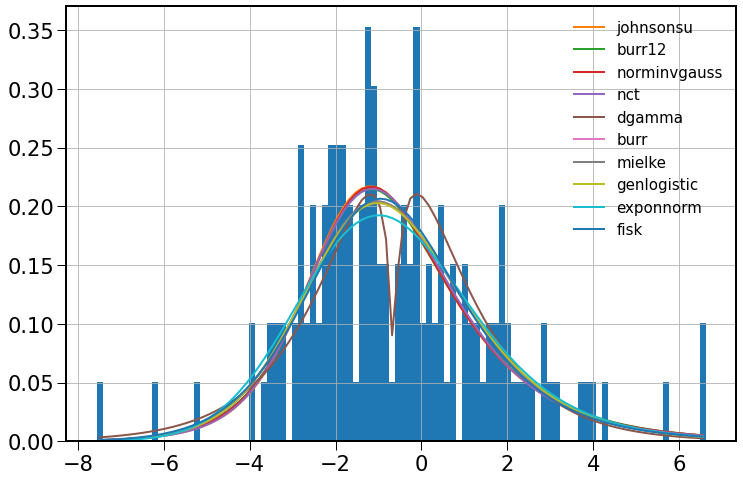

In [9]:
f_RM_vw = Fitter(dataRM['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_vw.fit()
f_RM_vw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,0.249926,697.402461,-871.127538,inf
triang,0.252111,653.285714,-869.908942,inf
genlogistic,0.254030,687.389285,-868.847216,inf
mielke,0.254150,675.605563,-863.839763,inf
burr,0.254150,675.605667,-863.839543,inf
skewnorm,0.254198,681.226598,-868.755118,inf
vonmises_line,0.254299,651.690336,-868.699296,inf
dgamma,0.254554,689.063605,-868.559006,inf
powerlognorm,0.254603,682.771758,-863.590087,inf
pearson3,0.254625,680.354904,-868.520115,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


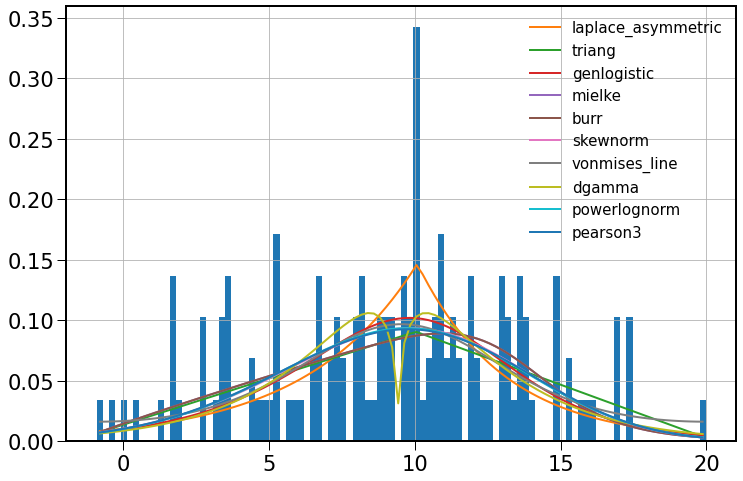

In [10]:
f_RM_uw = Fitter(dataRM['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_uw.fit()
f_RM_uw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
johnsonsb,0.148790,660.202411,-938.794395,inf
gausshyper,0.148792,656.947349,-928.908589,inf
exponweib,0.149125,658.469463,-938.479100,inf
beta,0.149678,660.176360,-937.960657,inf
genextreme,0.149948,666.810088,-942.650341,inf
mielke,0.150197,659.228154,-937.475988,inf
exponpow,0.150886,666.435653,-941.777108,inf
pearson3,0.151665,673.591381,-941.056763,inf
dweibull,0.151895,695.389730,-940.844014,inf
burr,0.151900,664.379092,-935.897978,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


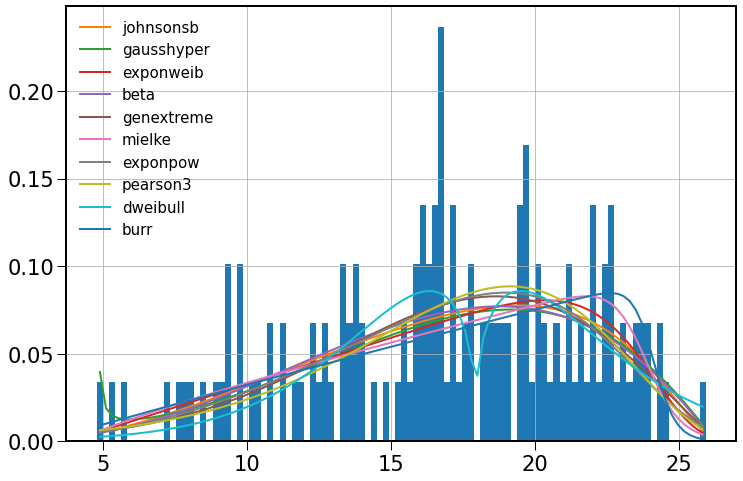

In [11]:
f_RM_gust = Fitter(dataRM['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_gust.fit()
f_RM_gust.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,0.201175,676.267655,-901.506428,inf
triang,0.201691,632.117426,-901.147394,inf
laplace,0.203033,670.376602,-905.160859,inf
loglaplace,0.203075,672.383005,-900.190411,inf
burr,0.204339,652.022679,-894.379875,inf
mielke,0.204339,652.022919,-894.379825,inf
gompertz,0.204485,645.179131,-899.221561,inf
foldnorm,0.206022,641.680375,-898.172872,inf
exponweib,0.206175,648.084751,-893.127896,inf
loggamma,0.207472,657.144688,-897.191270,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


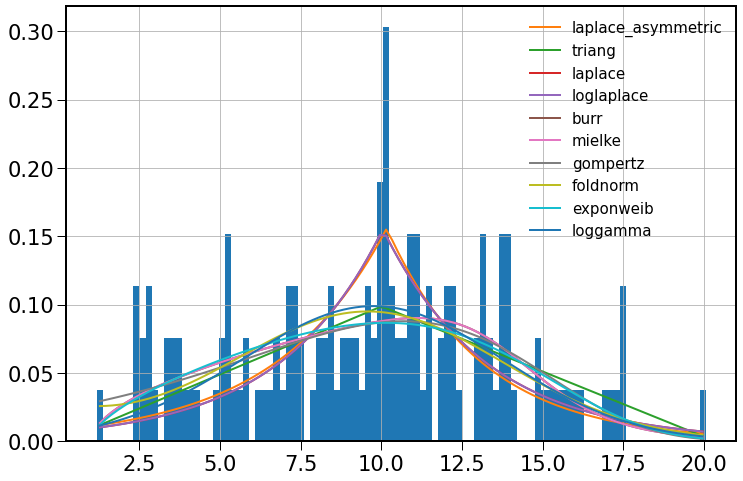

In [12]:
f_RM_sp = Fitter(dataRM['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_sp.fit()
f_RM_sp.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
skewcauchy,0.000406,1557.509851,-1770.162240,inf
johnsonsu,0.000414,1627.577773,-1762.651175,inf
foldcauchy,0.000445,1540.214736,-1757.540630,inf
cauchy,0.000445,1566.476888,-1762.305829,inf
gennorm,0.000456,1668.231576,-1753.935563,inf
laplace_asymmetric,0.000698,1887.055640,-1694.516286,inf
laplace,0.000786,1996.167429,-1682.796242,inf
loglaplace,0.000969,1946.977995,-1648.489134,inf
dweibull,0.001052,1670.583318,-1636.963295,inf
hypsecant,0.001121,2127.310185,-1632.993515,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


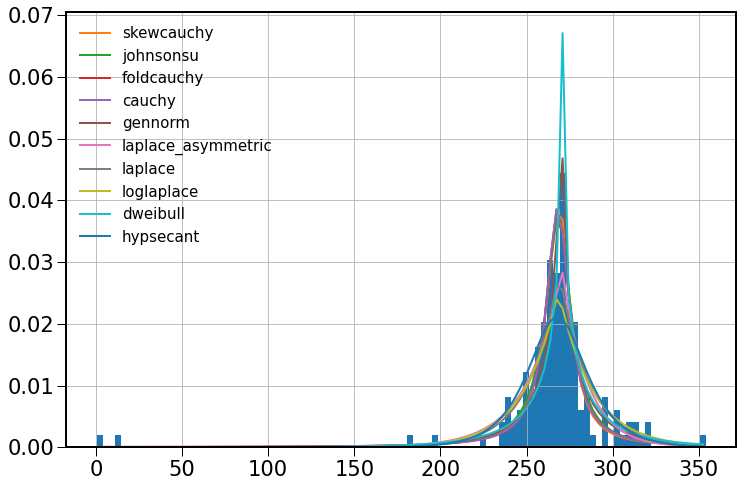

In [13]:
f_RM_dir = Fitter(dataRM['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_dir.fit()
f_RM_dir.summary(Nbest=10)

## Colorado Plateau

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
foldcauchy,2.658829,505.809074,-569.884434,inf
fisk,2.694375,494.248469,-567.945495,inf
loglaplace,2.718767,523.322231,-566.629665,inf
alpha,2.729490,508.857979,-566.054995,inf
genextreme,2.731914,498.838878,-565.925364,inf
invweibull,2.731935,498.838064,-565.924256,inf
johnsonsu,2.732659,483.279954,-560.901982,inf
lognorm,2.732974,481.404383,-565.868756,inf
invgauss,2.734246,477.666099,-565.800803,inf
invgamma,2.735775,495.303351,-565.719167,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


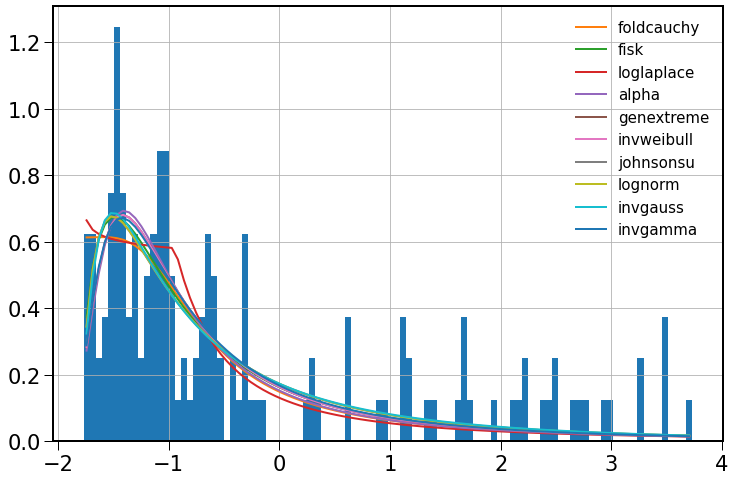

In [14]:
f_CP_vw = Fitter(dataCP['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_vw.fit()
f_CP_vw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg =

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,8.209533,344.985845,-405.282523,inf
gausshyper,8.213712,288.916016,-390.257396,inf
johnsonsb,8.239927,287.819376,-399.759382,inf
bradford,8.304986,285.239233,-403.594758,inf
truncexpon,8.332442,287.338120,-403.112893,inf
beta,8.356083,284.170341,-397.715630,inf
kappa4,8.382684,283.953364,-397.251593,inf
skewnorm,8.385521,319.592867,-402.185792,inf
wrapcauchy,8.390901,281.285898,-402.092155,inf
uniform,8.401617,279.248805,-406.889422,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


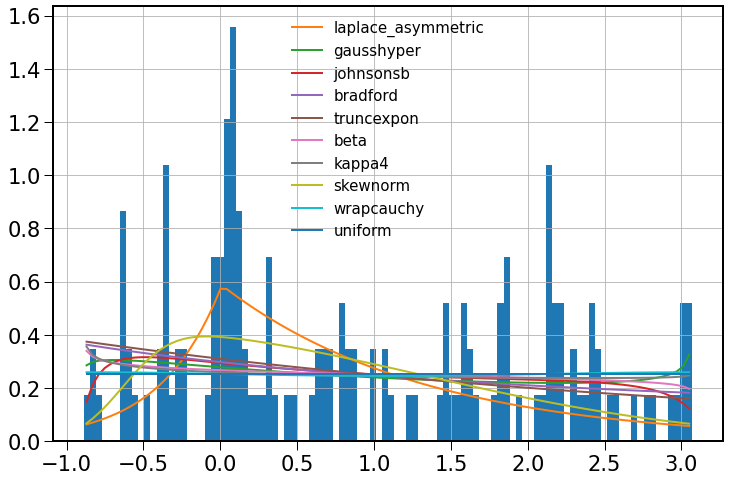

In [15]:
f_CP_uw = Fitter(dataCP['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_uw.fit()
f_CP_uw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/pyth

,sumsquare_error,aic,bic,kl_div
johnsonsb,11.563878,250.757060,-350.280745,inf
exponnorm,11.697948,282.840889,-353.581383,inf
laplace_asymmetric,11.766020,284.271755,-352.734249,inf
gilbrat,11.914050,292.445728,-355.892474,inf
wald,11.941976,290.369079,-355.550652,inf
geninvgauss,12.060862,277.244637,-344.137155,inf
recipinvgauss,12.103561,282.466142,-348.604795,inf
burr12,12.108016,285.467838,-343.567458,inf
erlang,12.134784,275.284453,-348.228644,inf
gamma,12.134821,275.290813,-348.228197,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


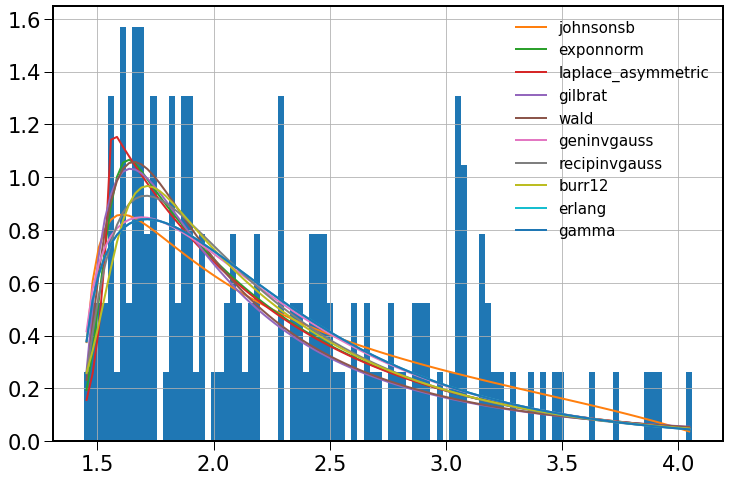

In [16]:
f_CP_gust = Fitter(dataCP['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_gust.fit()
f_CP_gust.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/pyth

,sumsquare_error,aic,bic,kl_div
dweibull,8.577280,292.432012,-398.884680,inf
dgamma,8.671567,296.224874,-397.288514,inf
foldnorm,8.751042,267.457233,-395.956519,inf
exponpow,8.770760,265.064504,-395.627928,inf
gompertz,8.779594,264.617347,-395.480948,inf
genexpon,8.787770,271.477478,-385.377824,inf
triang,8.796742,258.821069,-395.196054,inf
exponweib,8.801313,266.344382,-390.136599,inf
gengamma,8.803982,266.641143,-390.092333,inf
johnsonsb,8.807943,263.602485,-390.026661,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


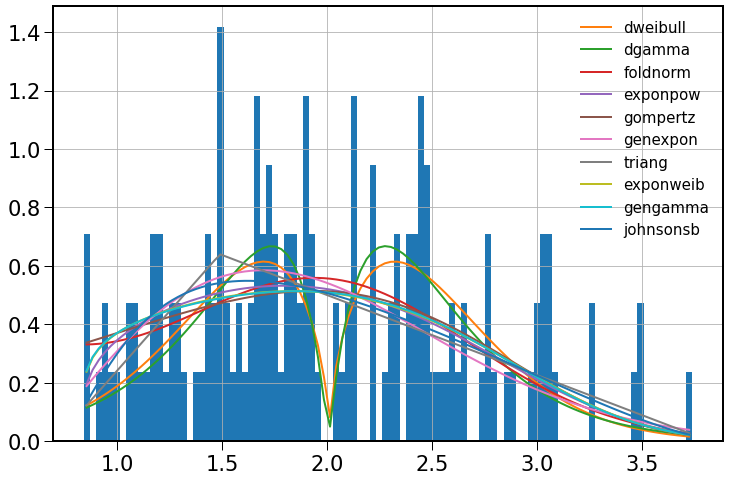

In [17]:
f_CP_speed = Fitter(dataCP['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_speed.fit()
f_CP_speed.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
genpareto,0.001532,1200.597329,-1658.865834,inf
genhalflogistic,0.001536,1210.959673,-1658.535189,inf
gausshyper,0.001538,1221.930571,-1643.381491,inf
beta,0.001539,1228.446397,-1653.305770,inf
johnsonsb,0.001543,1208.687711,-1652.853700,inf
pearson3,0.001589,1260.548724,-1653.602780,inf
genlogistic,0.001592,1254.868810,-1653.303000,inf
loggamma,0.001592,1254.915567,-1653.296839,inf
laplace_asymmetric,0.001592,1254.811020,-1653.275622,inf
kappa4,0.001594,1189.585297,-1648.101217,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


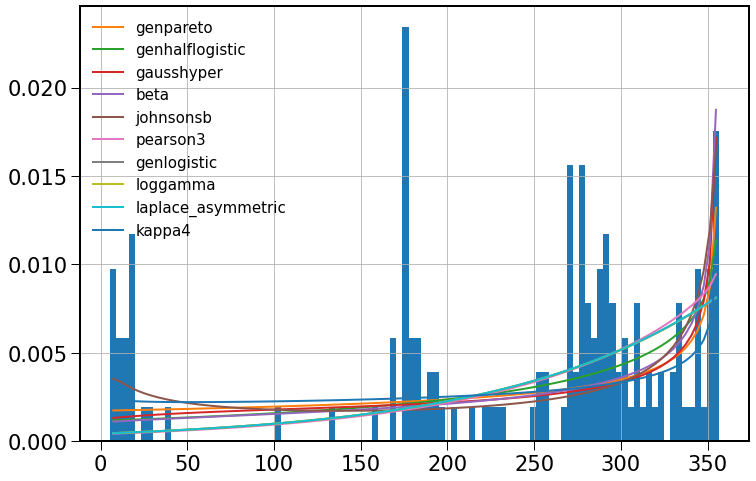

In [9]:
f_CP_dir = Fitter(dataCP['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_dir.fit()
f_CP_dir.summary(Nbest=10)

## Alta Wind Energy Center

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
skewcauchy,1.903557,570.418460,-623.994810,inf
laplace_asymmetric,2.005963,519.504468,-616.292015,inf
johnsonsu,2.121135,542.612265,-603.095013,inf
burr12,2.224590,519.269017,-596.094678,inf
exponnorm,2.265960,513.943391,-598.376494,inf
mielke,2.368258,524.245246,-586.895130,inf
burr,2.372742,523.529487,-586.617052,inf
invweibull,2.388396,519.105959,-590.640877,inf
genextreme,2.388426,519.106153,-590.639028,inf
alpha,2.400889,522.852880,-589.873969,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


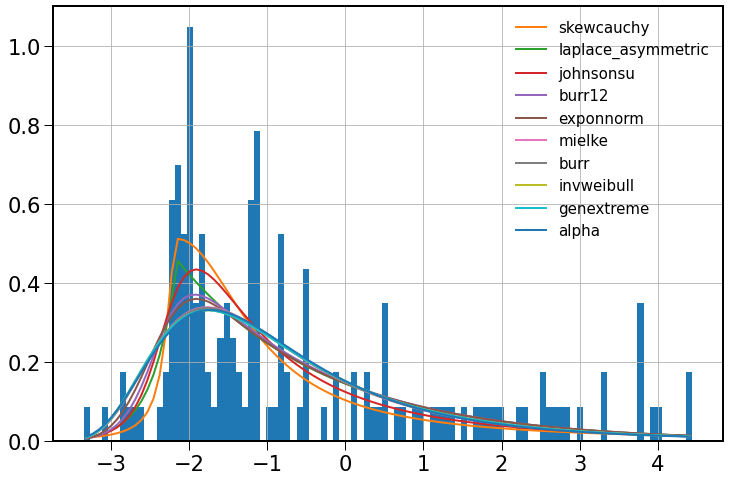

In [10]:
f_AWEC_vw = Fitter(dataAWEC['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_vw.fit()
f_AWEC_vw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The occurrenc

,sumsquare_error,aic,bic,kl_div
triang,3.744321,322.410310,-524.546960,inf
vonmises_line,3.834459,307.899285,-521.050143,inf
foldnorm,3.867285,326.279773,-519.797042,inf
rice,3.876035,332.727967,-519.464824,inf
burr12,3.879205,335.470064,-514.354221,inf
cosine,3.882242,325.161902,-524.220029,inf
nakagami,3.884928,337.059245,-519.127945,inf
betaprime,3.885060,339.072292,-514.132495,inf
erlang,3.885662,337.207801,-519.100179,inf
gamma,3.885683,337.216722,-519.099378,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


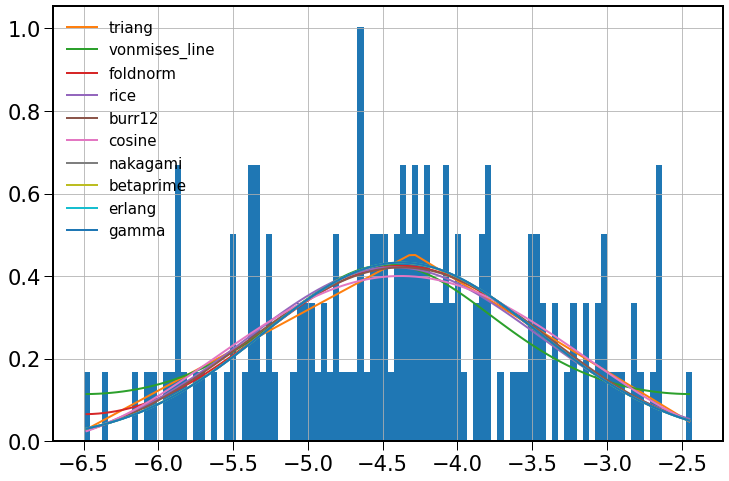

In [11]:
f_AWEC_uw = Fitter(dataAWEC['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_uw.fit()
f_AWEC_uw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site

,sumsquare_error,aic,bic,kl_div
pearson3,3.863366,335.819786,-519.946077,inf
johnsonsu,3.864479,338.486434,-514.913320,inf
loggamma,3.865887,337.093431,-519.850183,inf
powerlognorm,3.867818,338.984487,-514.786348,inf
burr12,3.868721,336.610852,-514.752034,inf
weibull_min,3.869534,334.828742,-519.711579,inf
powernorm,3.869548,337.198674,-519.711045,inf
dweibull,3.878168,348.077060,-519.383952,inf
skewnorm,3.889640,335.978333,-518.949737,inf
beta,3.891566,330.823647,-513.886548,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


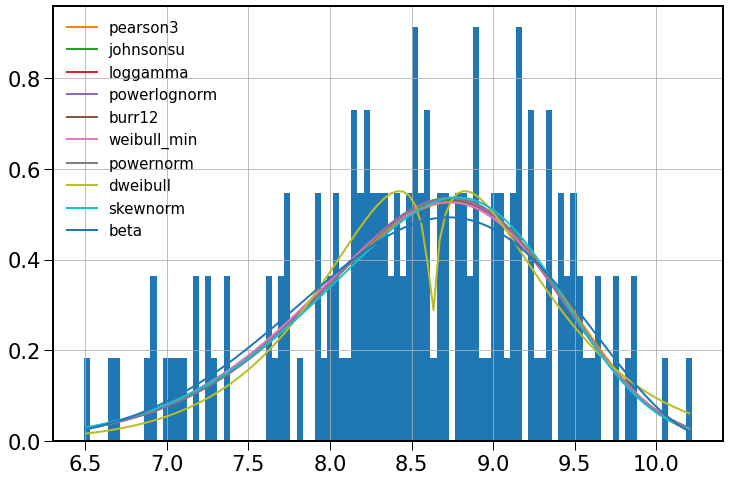

In [12]:
f_AWEC_gust = Fitter(dataAWEC['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_gust.fit()
f_AWEC_gust.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site

,sumsquare_error,aic,bic,kl_div
recipinvgauss,7.139169,326.847471,-429.679618,inf
foldnorm,7.141648,314.674769,-429.628599,inf
chi2,7.143143,324.955663,-429.597822,inf
betaprime,7.144658,326.817290,-424.576207,inf
rice,7.145371,320.674567,-429.551985,inf
chi,7.146776,323.582372,-429.523068,inf
erlang,7.146886,323.953995,-429.520812,inf
gamma,7.147356,323.984296,-429.511141,inf
invgamma,7.149574,326.150294,-429.465529,inf
alpha,7.151492,325.285494,-429.426099,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


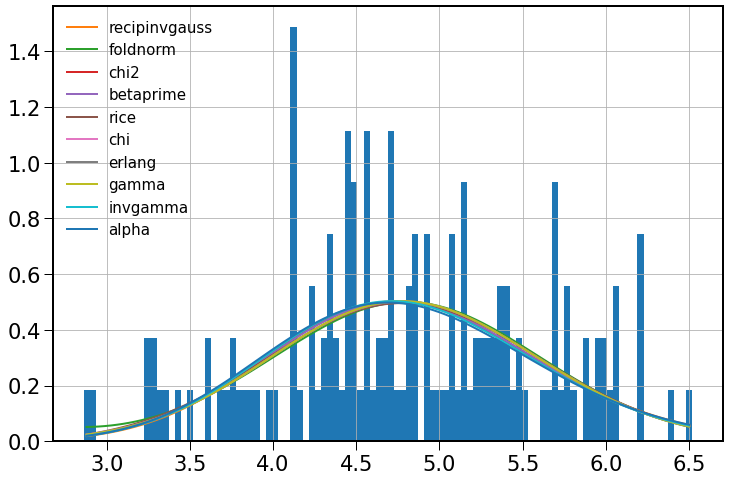

In [13]:
f_AWEC_speed = Fitter(dataAWEC['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_speed.fit()
f_AWEC_speed.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site

,sumsquare_error,aic,bic,kl_div
skewcauchy,0.006441,1089.521801,-1460.259178,inf
johnsonsu,0.006466,1074.534317,-1454.678566,inf
burr12,0.008239,1054.224197,-1419.065923,inf
laplace_asymmetric,0.008309,1029.423235,-1422.808005,inf
exponnorm,0.009916,1023.255046,-1396.817831,inf
cauchy,0.010252,1141.399126,-1396.910100,inf
foldcauchy,0.010463,1085.937173,-1388.934010,inf
alpha,0.010581,1041.638080,-1387.287006,inf
genextreme,0.010672,1034.250378,-1386.016631,inf
invweibull,0.010672,1034.250361,-1386.016625,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


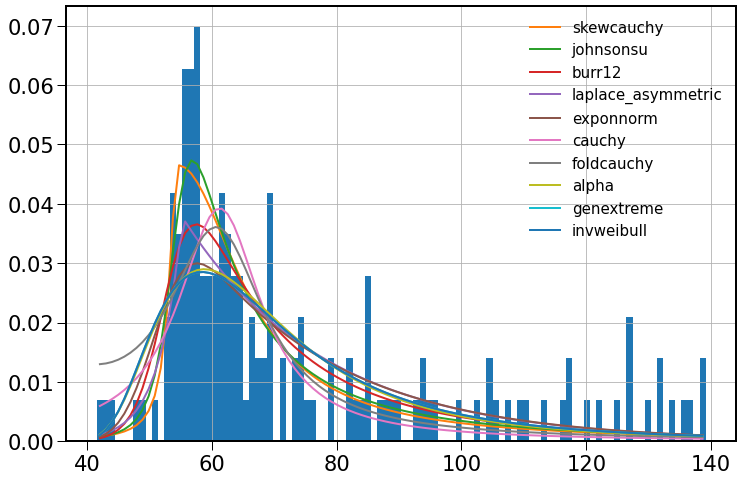

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [14]:
f_AWEC_dir = Fitter(dataAWEC['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_dir.fit()
f_AWEC_dir.summary(Nbest=10)